<a href="https://colab.research.google.com/github/YuliaVodopyanova/LAD_test/blob/main/LAD_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Информация о вакансиях аналитика данных по Нижнему Новгороду и Москве с сайта career.habr.com

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from urllib.request import urlopen

our_urls = [
    'https://career.habr.com/vacancies?locations[]=c_715&locations[]=c_678&page=1&q=%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D1%82%D0%B8%D0%BA%D0%B0%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85&type=all',
    'https://career.habr.com/vacancies?locations[]=c_715&locations[]=c_678&page=1&q=Data%20Science&type=all'
]

all_links = []

start = 'https://career.habr.com'

for url in our_urls:

  html_page = urlopen(url)
  soup = BeautifulSoup(html_page)
  for link in soup.findAll('a'):
    if link.get('href').startswith('/vacancies?locations%5B%5D='):
      proper_link = start + link.get('href')
      if proper_link not in all_links:
        all_links.append(proper_link)

for link in all_links: #some urls cannot be detected as they are not visible on the 1st page
  html_page = urlopen(link)
  soup = BeautifulSoup(html_page)
  for link_ in soup.findAll('a'):
    if link_.get('href').startswith('/vacancies?locations%5B%5D='):
      proper_link = start + link_.get('href')
      if proper_link not in all_links:
        all_links.append(proper_link)

In [2]:
vacancies = []

headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36 Edg/122.0.0.0"}

for url in all_links:
    response = requests.get(url, headers=headers)

    if response.status_code == 200:

        soup = BeautifulSoup(response.text, 'html.parser')

        vacancy = soup.find_all('div', {'class': 'vacancy-card__inner'})

        for i in vacancy:
            name = i.find('div', class_="vacancy-card__title").text
            additional_info = i.find('div', class_="vacancy-card__skills").text
            vacancies.append((name, additional_info))

In [3]:
res = {}
senior = []
middle = []
junior = []
no_info = []

for vacancy in vacancies:
    if 'senior' in vacancy[1].lower():
        senior.append(vacancy[0])
    if 'middle' in vacancy[1].lower():
        middle.append(vacancy[0])
    if 'junior' in vacancy[1].lower():
        junior.append(vacancy[0])
    if 'senior' not in vacancy[1].lower() and 'middle' not in vacancy[1].lower() and \
    'junior' not in vacancy[1].lower():
      no_info.append(vacancy[0])
    res['Senior positions'] = {'Vacancies': senior, 'Total count': len(senior)}
    res['Middle positions'] = {'Vacancies': middle, 'Total count': len(middle)}
    res['Junior positions'] = {'Vacancies': junior, 'Total count': len(junior)}
    res['Not specified level'] = {'Vacancies': no_info, 'Total count': len(no_info)}


df = pd.DataFrame(res)

In [4]:
print('Data science vacancies across NN and Moscow:\n\n')
df

Data science vacancies across NN and Moscow:




,Senior positions,Middle positions,Junior positions,Not specified level
Vacancies,[Руководитель направления (Клиентская аналитик...,"[Менеджер по качеству данных (SQL), Системный ...",[DevOps (Junior+/Middle)/Администратор тестовы...,"[Аналитик данных, Ведущий аналитик данных / На..."
Total count,64,111,9,63


In [5]:
df2 = df.drop('Vacancies')
print('Table only with number of vacancies of different levels:\n\n')
df2

Table only with number of vacancies of different levels:




,Senior positions,Middle positions,Junior positions,Not specified level
Total count,64,111,9,63


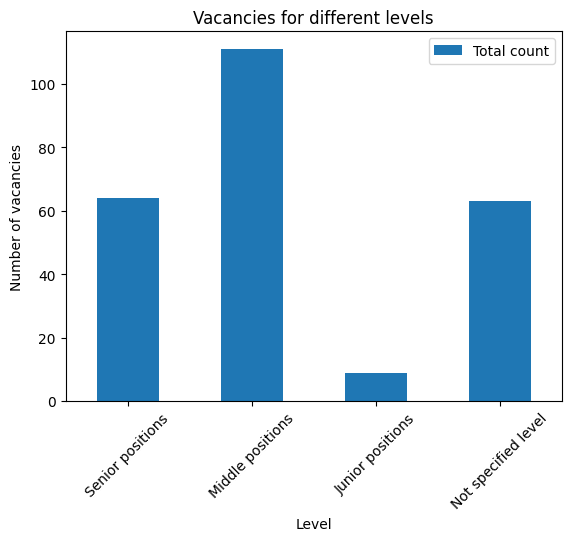

In [6]:
import matplotlib.pyplot as plt

df2.T.plot(kind='bar')
plt.xlabel('Level')
plt.ylabel('Number of vacancies')
plt.title('Vacancies for different levels')
plt.xticks(rotation=45)
plt.show()